In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon

%matplotlib inline

data = pd.read_csv("traffic-collision-data-from-2010-to-present.csv")

# Extract Longitude and Latitude Coordinates
location = data['Location']

longitude = []
latitude = []
for i in range(0, len(location)):
    longitude_sample = float(location[i][location[i].index(' ') + 2: location[i].index(',') - 1])
    latitude_sample = float(location[i][location[i].index('latitude') + 12: len(location[i]) - 2])
    if (longitude_sample < -118.1) and (latitude_sample > 33.4 and latitude_sample < 34.4) :
        longitude.append(longitude_sample)
        latitude.append(latitude_sample)
                   
# Extracted Coordinates 492963 when unfiltered
len(longitude)


492552

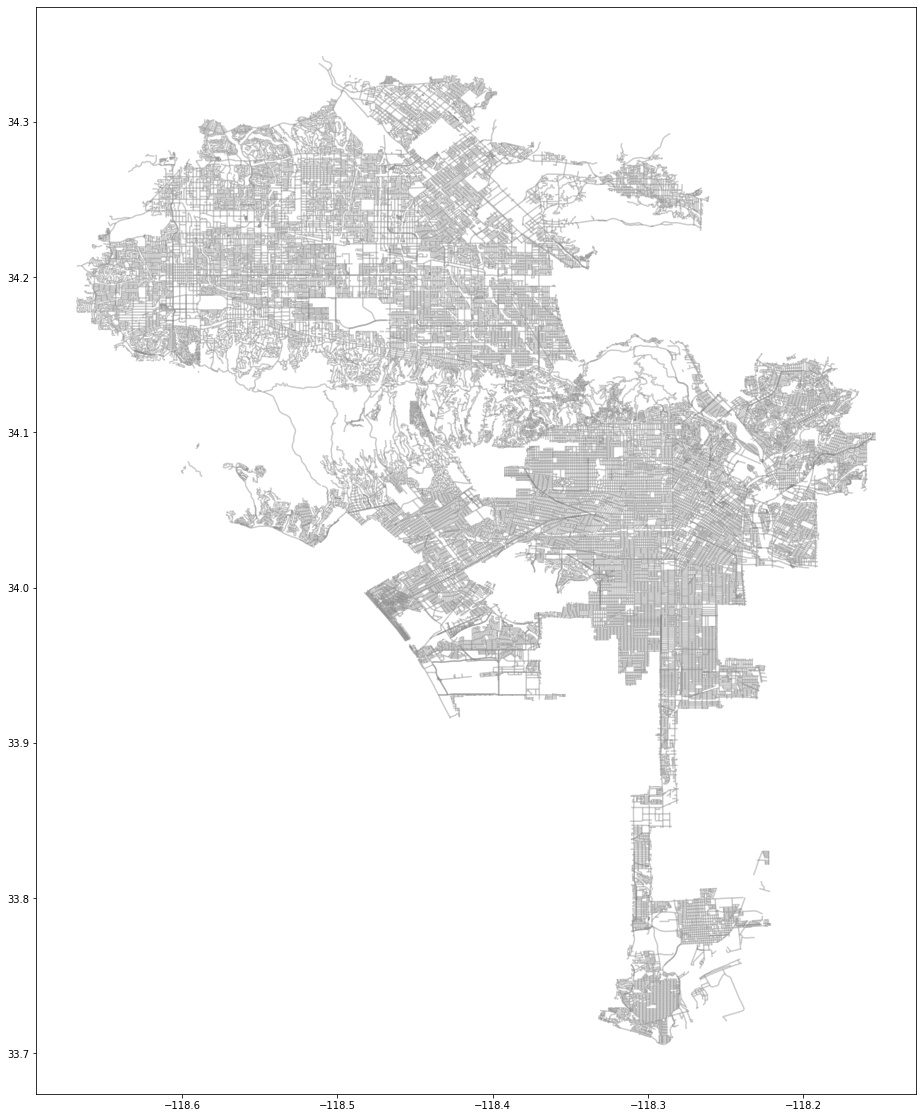

In [4]:
#Insert Longitude and Latitude into DataFrame
dict = {'Longitude' : longitude,'Latitude' : latitude}
coordinates = pd.DataFrame(data = dict)

#Visualize LA County map with streetlines
street_map = gpd.read_file('Streets_Centerline/Streets_Centerline.shp')
fig,ax = pt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')


In [42]:
#Create Points out of longitude and latitude
geometry = [Point(xy) for xy in zip(coordinates['Longitude'], coordinates['Latitude'])]
crs = {'init': 'epsg:4326'}
#Generate GeoDataFrame
geo_df = gpd.GeoDataFrame(coordinates, #Specify data
                          crs = crs, #Specify Coordinate Reference System
                          geometry = geometry #Specify the geometry list we created
                         )
geo_df

,Longitude,Latitude,geometry
0,-118.3603,34.0609,POINT (-118.3603 34.0609)
1,-118.4554,34.2751,POINT (-118.4554 34.2751)
2,-118.3277,33.9872,POINT (-118.3277 33.9872)
3,-118.3687,34.2616,POINT (-118.3687 34.2616)
4,-118.4075,34.1298,POINT (-118.4075 34.1298)
5,-118.2381,34.0497,POINT (-118.2381 34.0497)
6,-118.2574,34.0277,POINT (-118.2574 34.0277)
7,-118.3965,34.1867,POINT (-118.3965 34.1867)
8,-118.2823,34.0523,POINT (-118.2823 34.0523)
9,-118.2126,34.0541,POINT (-118.2126 34.0541)


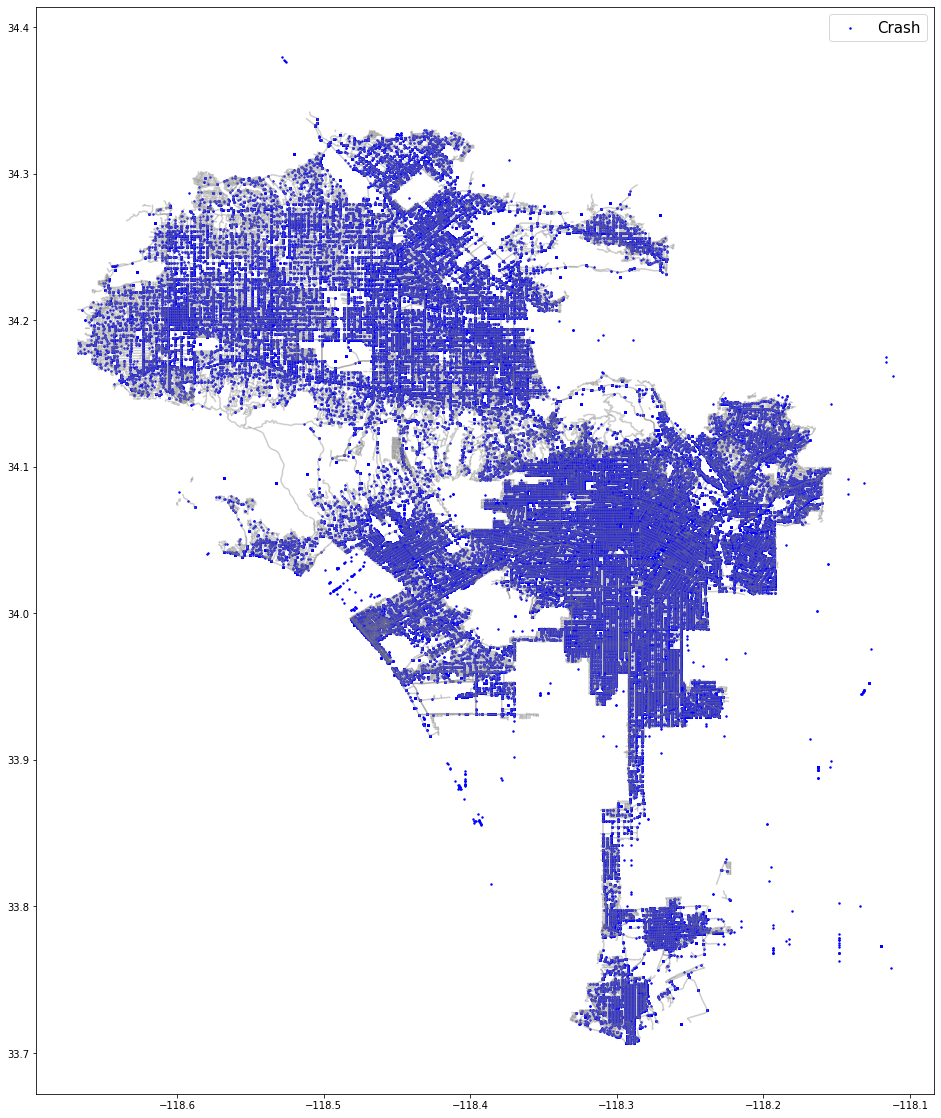

In [11]:
#Print out map with points plotted
fig,ax = pt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 2, color = 'blue', marker = 'o', label = 'Crash')
pt.legend(prop = {'size': 15})

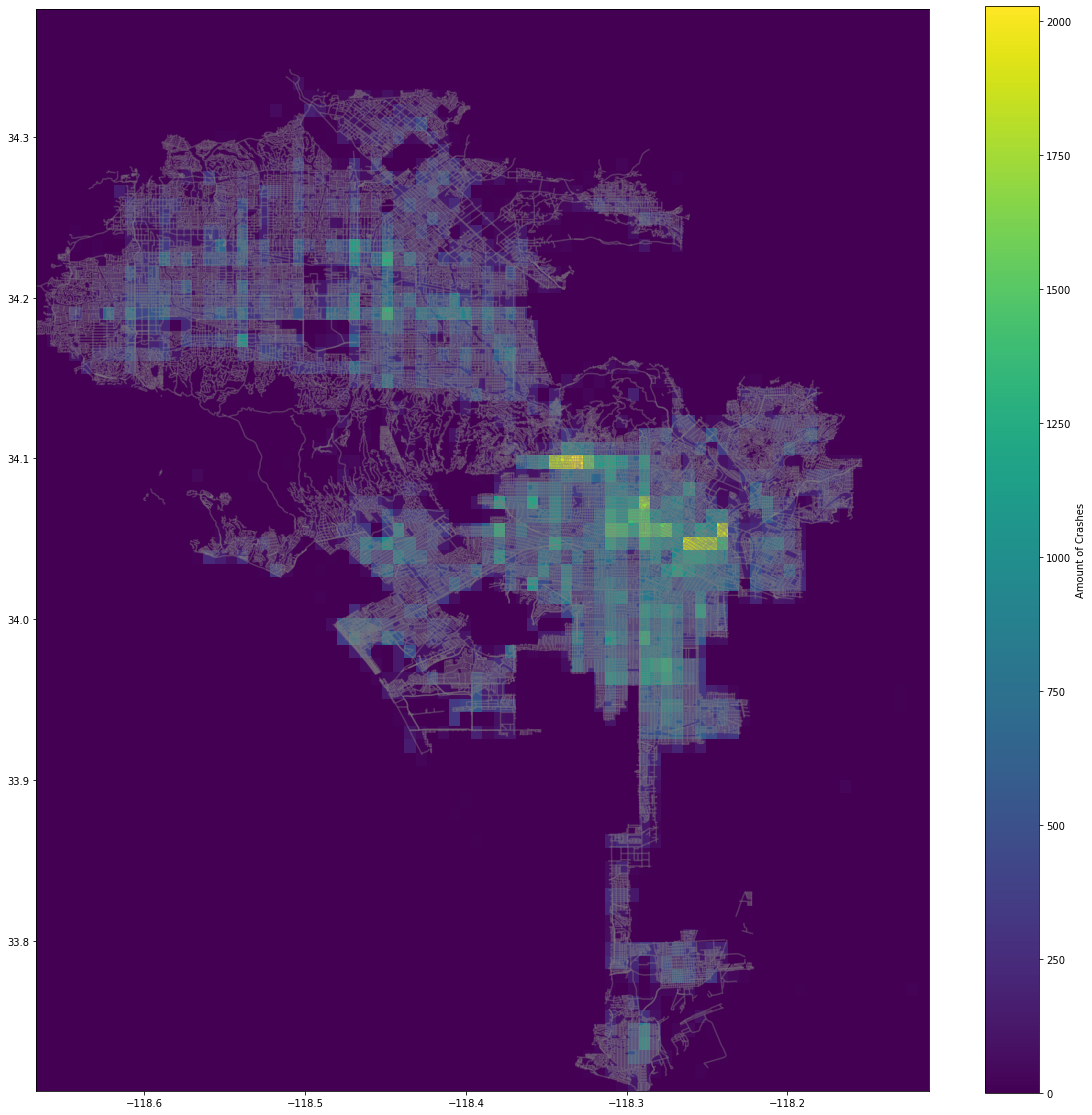

In [76]:
# Matplotlib square heatmap of crashes overlaying city map

fig,ax = pt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

heatmap, xedges, yedges = np.histogram2d(longitude, latitude, bins=80)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

pt.imshow(heatmap.T, extent=extent, origin='lower', alpha = 1)
cb = pt.colorbar()
cb.set_label('Amount of Crashes')
pt.show()

/Users/shonepatil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':


High frequency location: -118.32844499987779, 34.096247368421054
High frequency location: -118.30066999982223, 34.060815789473686
High frequency location: -118.33677749989445, 34.102152631578946
High frequency location: -118.33122249988334, 34.102152631578946
High frequency location: -118.29233749980557, 34.06672105263158
High frequency location: -118.2478974997167, 34.043099999999995
High frequency location: -118.24234249970559, 34.05491052631579


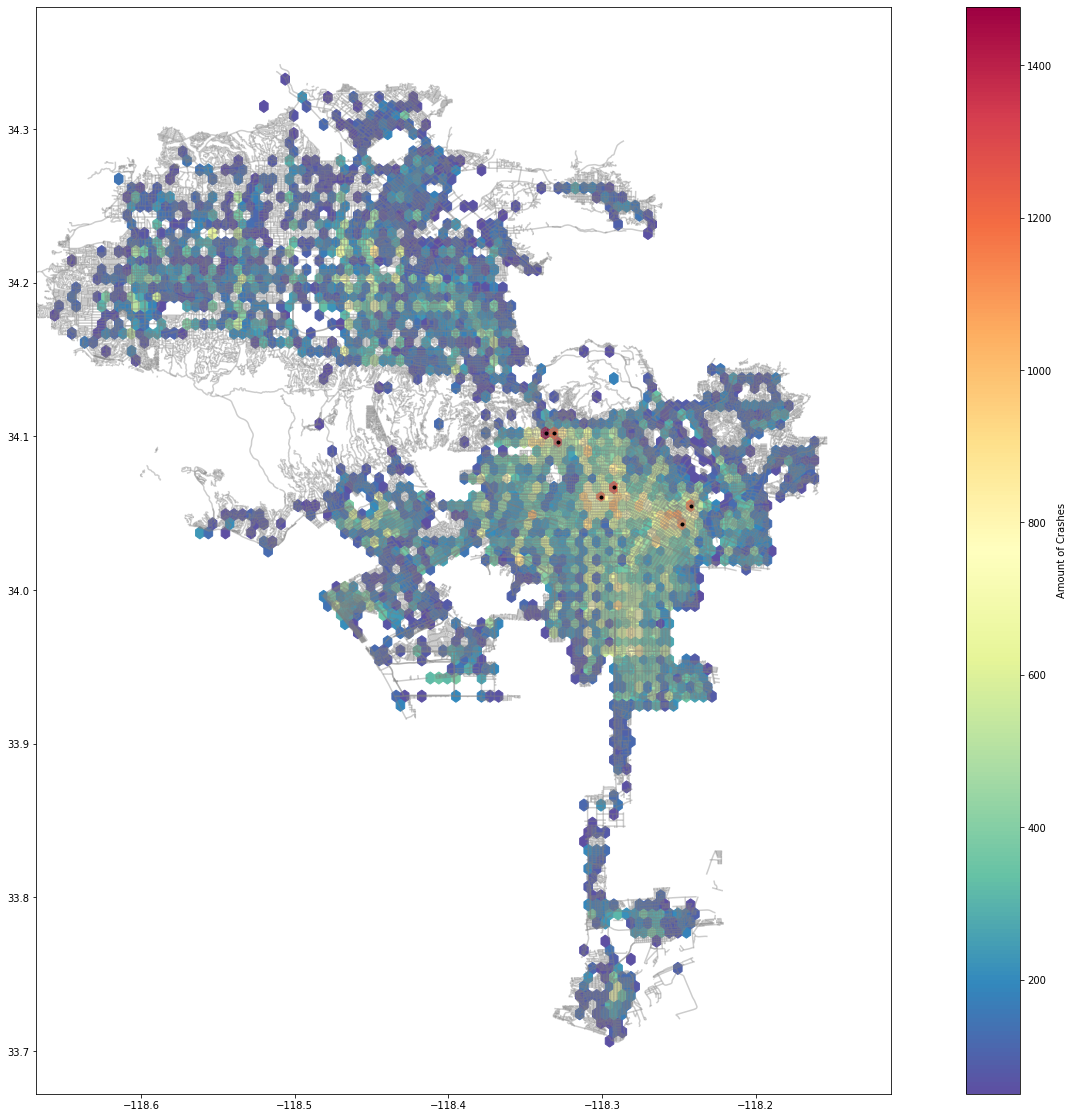

In [69]:
# Matplotlib hexagonal heatmap of crashes overlaying city map

fig,ax = pt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

pt.hexbin(longitude, latitude, C=None, gridsize = 100,mincnt = 50, cmap = pt.cm.Spectral_r)#hexbinning all crashes
cb = pt.colorbar()
image = pt.hexbin(longitude, latitude, C=None, gridsize = 100,mincnt = 1100, alpha = 0)#hexbinning most crashes

#Plot dots on high density crash locations( >= 1100 crashes)
counts = image.get_array()
ncnts = np.count_nonzero(np.power(10,counts))
verts = image.get_offsets()
for offc in range(verts.shape[0]):
    binx,biny = verts[offc][0],verts[offc][1]
    if counts[offc]:
        pt.plot(binx,biny,'k.',zorder=100)
        print("High frequency location: " + str(binx) + ", " +str(biny))#print locations of high density

pt.axis('image')#necessary for correct aspect ratio
cb.set_label('Amount of Crashes')
pt.show()   

Looking at the most concentrated crash locations, we see that a majority of crashes from the last 10 years are near 
Hollywood Boulevard between streets Highland Avenue and North Cahuenga Boulevard.


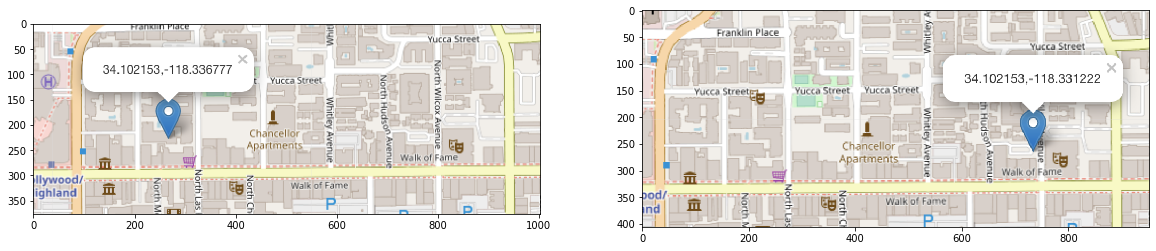

In [67]:
import matplotlib.image as mpimg

print("Looking at the most concentrated crash locations, "
      "we see that a majority of crashes from the last 10 years are near \nHollywood Boulevard "
      "between streets Highland Avenue and North Cahuenga Boulevard.")

img1 = mpimg.imread('Locations/first_area.png')
img2 = mpimg.imread('Locations/second_area.png')
f, axarr = pt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(img1)
axarr[1].imshow(img2)
pt.show()